# 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 인천 어린이집 데이터 불러오기
data = pd.read_csv('data/인천어린이집공원수포함id.csv',encoding='euc-kr')
data.head(3)

,시도,시군구,어린이집명,어린이집유형구분,운영현황,우편번호,주소,어린이집전화번호,어린이집팩스번호,보육실수,보육실면적,놀이터수,보육교직원수,정원수,현원수,위도,경도,통학차량운영여부,500m내 공원수,id
0,인천광역시,동구,송현어린이집,민간,재개,22516,인천광역시 동구 화수로 57 (화수동),032-773-9062,032-765-5277,3,59,0,5,22,6,37.483560,126.632032,미운영,3,1
1,인천광역시,중구,찬솔어린이집,국공립,재개,22351,"인천광역시 중구 축항대로86번길 47 3동 101호(항동7가, 라이프아파트)",032-888-3746,032-888-1558,3,55,0,3,20,5,37.451640,126.605977,미운영,0,2
2,인천광역시,연수구,빛솔어린이집,민간,재개,21947,인천광역시 연수구 한진로 49 현대5차아파트 관리동(옥련동),032-833-0083,032-833-0083,4,89,1,5,30,7,37.426909,126.647242,운영,1,3


In [ ]:
data.shape # 데이터 확인

(1654, 20)

In [ ]:
data.columns  # 칼럼 확인

Index(['시도', '시군구', '어린이집명', '어린이집유형구분', '운영현황', '우편번호', '주소', '어린이집전화번호',
       '어린이집팩스번호', '보육실수', '보육실면적', '놀이터수', '보육교직원수', '정원수', '현원수', '위도', '경도',
       '통학차량운영여부', '500m내 공원수', 'id'],
      dtype='object')

In [ ]:
# 사용할 칼럼만 추출
df = data[['id','어린이집명','어린이집유형구분','보육실수','보육실면적','놀이터수','보육교직원수','정원수','현원수',
         '통학차량운영여부', '500m내 공원수']]
df.head()

,id,어린이집명,어린이집유형구분,보육실수,보육실면적,놀이터수,보육교직원수,정원수,현원수,통학차량운영여부,500m내 공원수
0,1,송현어린이집,민간,3,59,0,5,22,6,미운영,3
1,2,찬솔어린이집,국공립,3,55,0,3,20,5,미운영,0
2,3,빛솔어린이집,민간,4,89,1,5,30,7,운영,1
3,4,파란들어린이집,민간,7,370,2,9,84,32,운영,4
4,5,아이원어린이집,민간,4,93,0,3,35,10,미운영,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1654 non-null   int64 
 1   어린이집명      1654 non-null   object
 2   어린이집유형구분   1654 non-null   object
 3   보육실수       1654 non-null   int64 
 4   보육실면적      1654 non-null   int64 
 5   놀이터수       1654 non-null   int64 
 6   보육교직원수     1654 non-null   int64 
 7   정원수        1654 non-null   int64 
 8   현원수        1654 non-null   int64 
 9   통학차량운영여부   1654 non-null   object
 10  500m내 공원수  1654 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 142.3+ KB


In [ ]:
df['어린이집유형구분'].value_counts() 

가정        697
민간        597
국공립       259
직장         78
사회복지법인     11
법인·단체등      9
협동          3
Name: 어린이집유형구분, dtype: int64

# 데이터 전처리

In [ ]:
# 어린이집유형구분 라벨링
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['어린이집유형구분2'] = label.fit_transform(df['어린이집유형구분'])
print(label.classes_)
print(label.inverse_transform([0,1,2,3,4,5]))

# 통학차량운영여부 라벨링
df['통학차량운영여부'] = df['통학차량운영여부'].replace({'운영':1, '미운영':0})

['가정' '국공립' '민간' '법인·단체등' '사회복지법인' '직장' '협동']
['가정' '국공립' '민간' '법인·단체등' '사회복지법인' '직장']


<ipython-input-8-e10ea0005696>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['어린이집유형구분2'] = label.fit_transform(df['어린이집유형구분'])
<ipython-input-8-e10ea0005696>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['통학차량운영여부'] = df['통학차량운영여부'].replace({'운영':1, '미운영':0})


In [ ]:
# 스케일 변환
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
col = ['보육실수','보육실면적','놀이터수','보육교직원수','정원수','현원수', '500m내 공원수']
df[col] = scaler.fit_transform(df[col])

<ipython-input-9-3a547f45710a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = scaler.fit_transform(df[col])
C:\Users\82108\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [ ]:
df.head()

,id,어린이집명,어린이집유형구분,보육실수,보육실면적,놀이터수,보육교직원수,정원수,현원수,통학차량운영여부,500m내 공원수,어린이집유형구분2
0,1,송현어린이집,민간,0.05,0.025305,0.000000,0.065789,0.038062,0.020548,0,0.272727,2
1,2,찬솔어린이집,국공립,0.05,0.021815,0.000000,0.039474,0.031142,0.017123,0,0.000000,1
2,3,빛솔어린이집,민간,0.10,0.051483,0.166667,0.065789,0.065744,0.023973,1,0.090909,2
3,4,파란들어린이집,민간,0.25,0.296684,0.333333,0.118421,0.252595,0.109589,1,0.363636,2
4,5,아이원어린이집,민간,0.10,0.054974,0.000000,0.039474,0.083045,0.034247,0,0.363636,2


In [ ]:
df.isnull().sum()

id           0
어린이집명        0
어린이집유형구분     0
보육실수         0
보육실면적        0
놀이터수         0
보육교직원수       0
정원수          0
현원수          0
통학차량운영여부     0
500m내 공원수    0
어린이집유형구분2    0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.head()

,id,어린이집명,어린이집유형구분,보육실수,보육실면적,놀이터수,보육교직원수,정원수,현원수,통학차량운영여부,500m내 공원수,어린이집유형구분2
0,1,송현어린이집,민간,0.05,0.025305,0.000000,0.065789,0.038062,0.020548,0,0.272727,2
1,2,찬솔어린이집,국공립,0.05,0.021815,0.000000,0.039474,0.031142,0.017123,0,0.000000,1
2,3,빛솔어린이집,민간,0.10,0.051483,0.166667,0.065789,0.065744,0.023973,1,0.090909,2
3,4,파란들어린이집,민간,0.25,0.296684,0.333333,0.118421,0.252595,0.109589,1,0.363636,2
4,5,아이원어린이집,민간,0.10,0.054974,0.000000,0.039474,0.083045,0.034247,0,0.363636,2


# 변수간 상관관계 파악

C:\Users\82108\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82108\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


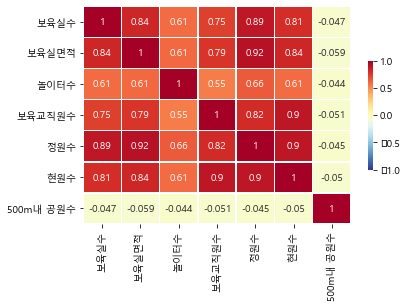

In [ ]:
# 칼럼간 상관관계 확인
import seaborn as sns
import matplotlib
cor = df[col].corr()
matplotlib.rc('font', family='Malgun Gothic')
sns.heatmap(cor, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            #mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

# 차원축소-umap


In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Dimension reduction and clustering libraries
import umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [ ]:
clusterable_embedding

array([[-2.3825164, -1.5117496],
       [-2.1287081,  9.352546 ],
       [ 9.281508 , 10.327398 ],
       ...,
       [10.323492 , 11.199215 ],
       [11.074241 , 11.22888  ],
       [11.728098 , 10.693921 ]], dtype=float32)

C:\Users\82108\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82108\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


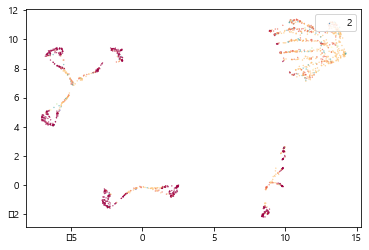

In [ ]:
# umap
clusterable_embedding = umap.UMAP(
    n_neighbors=50,
    min_dist=0.1,
     n_components=2, # 2-dim
    random_state=20,
).fit_transform(df[col])


In [ ]:
# umap plot 
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1], 
            c=df['어린이집유형구분2'],
            s=0.1, cmap='Spectral')
plt.legend(df['어린이집유형구분2'], loc= 'upper right')
plt.show()

# 클러스터링-hdbscan

In [ ]:
# hdbscan
import hdbscan
hdbscan = hdbscan.HDBSCAN(
    min_samples=20,
    min_cluster_size=100,
).fit(clusterable_embedding)

<AxesSubplot:ylabel='$\\lambda$ value'>

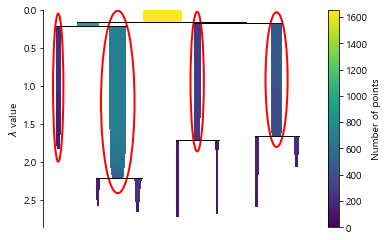

In [ ]:
# condensed_tree_
hdbscan.condensed_tree_.plot(select_clusters=True)

In [ ]:
import hdbscan
labels = hdbscan.HDBSCAN(
    min_samples=20,
    min_cluster_size=100,
).fit_predict(clusterable_embedding)

C:\Users\82108\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82108\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


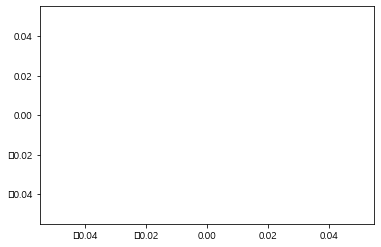

In [ ]:
# 모두다 클러스터링 되었다.
clustered = (labels >= 0)
plt.scatter(clusterable_embedding[~clustered, 0],
            clusterable_embedding[~clustered, 1],
            color=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)


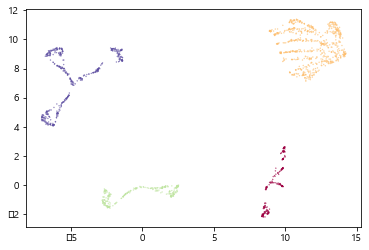

In [ ]:
# 차원축소한 그래프에 차원축소하여 클러스터링하여 그리기
plt.scatter(clusterable_embedding[clustered, 0],
            clusterable_embedding[clustered, 1],
            c=labels[clustered],
            s=0.1,
            cmap='Spectral');

C:\Users\82108\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82108\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


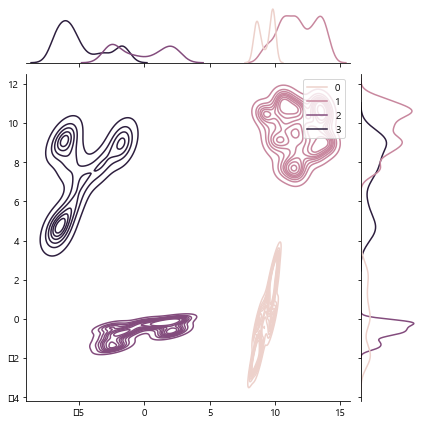

In [ ]:
sns.jointplot(
    x=clusterable_embedding[clustered, 0], y=clusterable_embedding[clustered, 1],
    hue=labels[clustered], kind="kde"
)

In [ ]:
np.unique(labels)

array([0, 1, 2, 3], dtype=int64)

In [ ]:
unique, counts = np.unique(labels, return_counts=True)

print (np.asarray((unique, counts)).T)

[[  0 216]
 [  1 699]
 [  2 278]
 [  3 461]]


In [ ]:
df['특징분류'] = labels
df_group = df.groupby(['특징분류','어린이집유형구분'])['어린이집유형구분'].count()

In [ ]:
df_2 = df[['id','특징분류']]
df_2.shape

(1654, 2)

In [ ]:
df_2['특징분류'].unique()

array([2, 3, 1, 0], dtype=int64)

In [ ]:
df_final = pd.merge(data,df_2, how='outer',on='id')
df_final.columns

Index(['시도', '시군구', '어린이집명', '어린이집유형구분', '운영현황', '우편번호', '주소', '어린이집전화번호',
       '어린이집팩스번호', '보육실수', '보육실면적', '놀이터수', '보육교직원수', '정원수', '현원수', '위도', '경도',
       '통학차량운영여부', '500m내 공원수', 'id', '특징분류'],
      dtype='object')

In [ ]:
df_final['특징분류'].unique()

array([2, 3, 1, 0], dtype=int64)

In [ ]:
df_final.shape

(1654, 21)

In [ ]:
# df_final.to_csv('data/어린이집특징분류_최종.csv')

In [ ]:
df_eda = df_final[['어린이집명','어린이집유형구분','보육실수','보육실면적','놀이터수','보육교직원수','정원수','현원수',
         '통학차량운영여부', '500m내 공원수','특징분류']]

In [ ]:
# 특징분류별 변수 평균값
df_eda.groupby('특징분류').mean()

,보육실수,보육실면적,놀이터수,보육교직원수,정원수,현원수,500m내 공원수
특징분류,,,,,,,
0,3.518519,92.907407,0.041667,6.972222,25.597222,18.662037,6.560185
1,6.484979,273.291845,1.434907,13.613734,80.638054,57.854077,2.547926
2,3.482014,85.014388,0.000000,6.467626,23.262590,17.485612,3.453237
3,3.624729,90.195228,0.000000,6.824295,24.689805,18.728850,1.013015


In [ ]:
# 통학차량운영여부 barplot을 위한 그룹통계  
bus_sum = df_eda.groupby(['특징분류','통학차량운영여부']).어린이집명.count()
bus_sum = pd.DataFrame(bus_sum)
bus_sum = bus_sum.reset_index()
bus_sum

,특징분류,통학차량운영여부,어린이집명
0,0,미운영,170
1,0,운영,46
2,1,미운영,329
3,1,운영,370
4,2,미운영,237
5,2,운영,41
6,3,미운영,376
7,3,운영,85


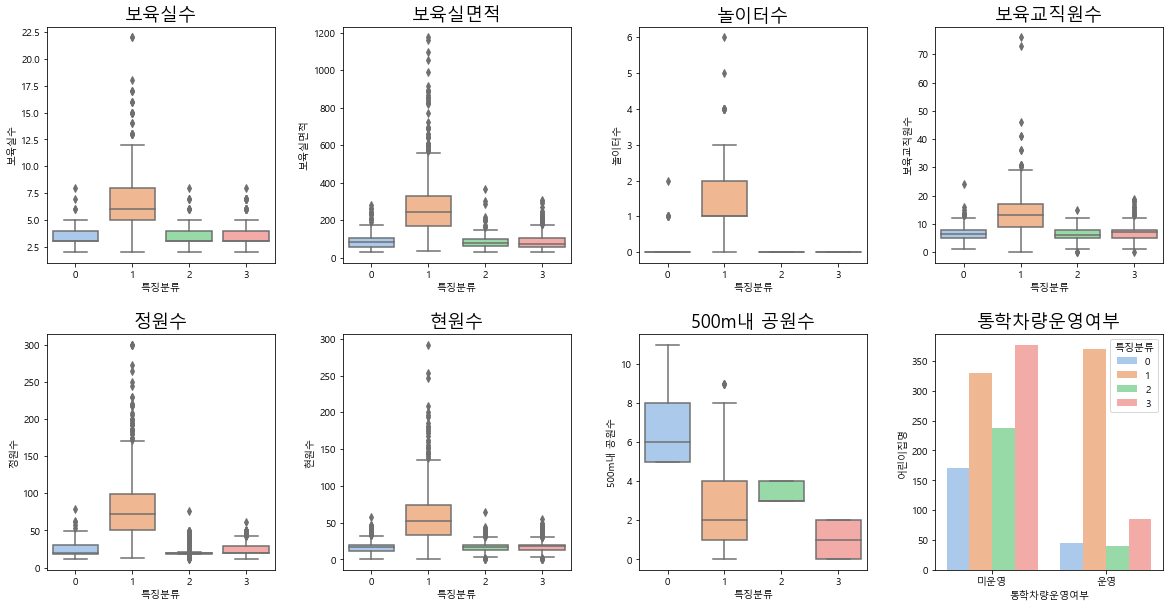

In [ ]:
# 특징 그룹별 그래프
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
sns.set_palette("pastel")
plt.subplot(2,4,1)
sns.boxplot(x = '특징분류', y ='보육실수',data=df_eda).set_title("보육실수",size=18)
plt.subplot(2,4,2)
sns.boxplot(x = '특징분류', y ='보육실면적',data=df_eda).set_title("보육실면적",size=18)
plt.subplot(2,4,3)
sns.boxplot(x = '특징분류', y ='놀이터수',data=df_eda).set_title("놀이터수",size=18)
plt.subplot(2,4,4)
sns.boxplot(x = '특징분류', y ='보육교직원수',data=df_eda).set_title("보육교직원수",size=18)
plt.subplot(2,4,5)
sns.boxplot(x = '특징분류', y ='정원수',data=df_eda).set_title("정원수",size=18)
plt.subplot(2,4,6)
sns.boxplot(x = '특징분류', y ='현원수',data=df_eda).set_title("현원수",size=18)
plt.subplot(2,4,7)
sns.boxplot(x = '특징분류', y ='500m내 공원수',data=df_eda).set_title("500m내 공원수",size=18)
plt.subplot(2,4,8)
sns.barplot(x = '통학차량운영여부',y='어린이집명', hue ='특징분류' ,data=bus_sum).set_title("통학차량운영여부",size=18)
plt.show()

In [ ]:
df_eda2 = df_eda[(df_eda['특징분류']==2)|(df_eda['특징분류']==3)]

In [ ]:
# 통학차량운영여부 barplot을 위한 그룹통계  
bus_sum2 = df_eda2.groupby(['특징분류','통학차량운영여부']).어린이집명.count()
bus_sum2 = pd.DataFrame(bus_sum2)
bus_sum2= bus_sum2.reset_index()
bus_sum2

,특징분류,통학차량운영여부,어린이집명
0,2,미운영,237
1,2,운영,41
2,3,미운영,376
3,3,운영,85


C:\Users\82108\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82108\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


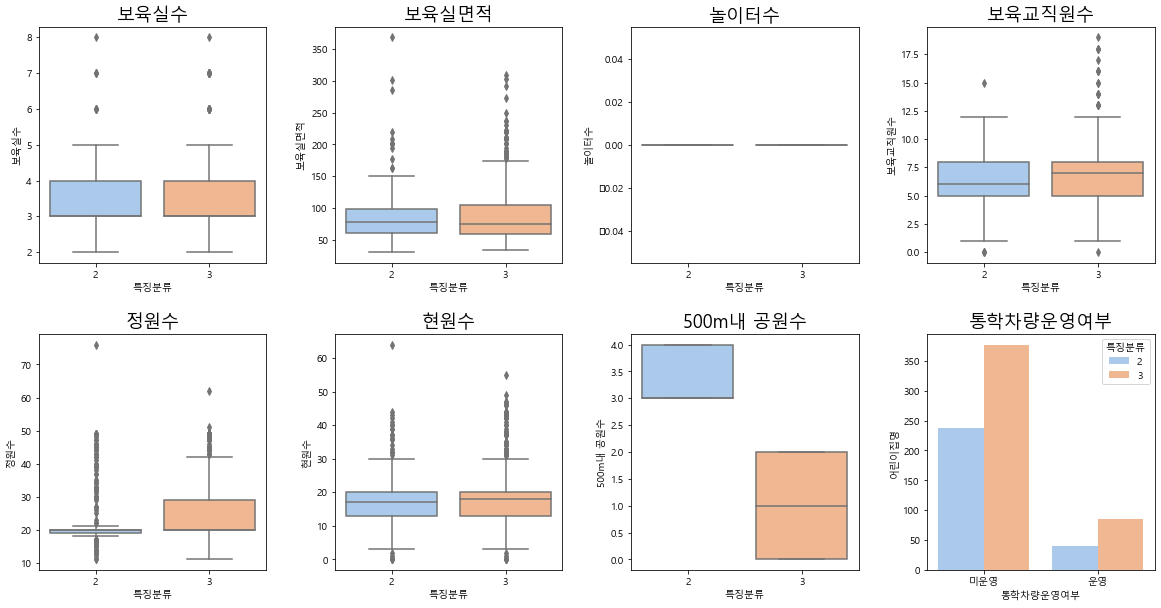

In [ ]:
# 특징 그룹별 그래프
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
sns.set_palette("pastel")
plt.subplot(2,4,1)
sns.boxplot(x = '특징분류', y ='보육실수',data=df_eda2).set_title("보육실수",size=18)
plt.subplot(2,4,2)
sns.boxplot(x = '특징분류', y ='보육실면적',data=df_eda2).set_title("보육실면적",size=18)
plt.subplot(2,4,3)
sns.boxplot(x = '특징분류', y ='놀이터수',data=df_eda2).set_title("놀이터수",size=18)
plt.subplot(2,4,4)
sns.boxplot(x = '특징분류', y ='보육교직원수',data=df_eda2).set_title("보육교직원수",size=18)
plt.subplot(2,4,5)
sns.boxplot(x = '특징분류', y ='정원수',data=df_eda2).set_title("정원수",size=18)
plt.subplot(2,4,6)
sns.boxplot(x = '특징분류', y ='현원수',data=df_eda2).set_title("현원수",size=18)
plt.subplot(2,4,7)
sns.boxplot(x = '특징분류', y ='500m내 공원수',data=df_eda2).set_title("500m내 공원수",size=18)
plt.subplot(2,4,8)
sns.barplot(x = '통학차량운영여부',y='어린이집명', hue ='특징분류' ,data=bus_sum2).set_title("통학차량운영여부",size=18)
plt.show()